In [1]:
import sys, os, time
from pathlib import Path
os.environ['FOUNDATION_RUN_MODE'] = 'jupyter'
# %load_ext autoreload
# %autoreload 2
# %pdb
import random
from omnibelt import load_yaml
import omnifig as fig

import h5py as hf

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.distributions as distrib
import torch.multiprocessing as mp
import torchvision.models
from torch.utils.data import Dataset, DataLoader
import gym
import inspect
import numpy as np
%matplotlib notebook
#%matplotlib tk
import matplotlib.pyplot as plt
#plt.switch_backend('Qt5Agg') #('Qt5Agg')
import foundation as fd
from foundation import models
from foundation import util
#from foundation.util import replicate, Cloner
np.set_printoptions(linewidth=120)
fig.initialize()

In [2]:
root = Path(os.environ['FOUNDATION_SAVE_DIR'])
root

WindowsPath('C:/Users/anwan/Documents/workspace/trained_nets')

In [3]:
run_paths = list(root.glob('*'))
run_path = random.choice(run_paths)
run_path

WindowsPath('C:/Users/anwan/Documents/workspace/trained_nets/test-pycharm_201225-020804')

In [4]:
run = fig.quick_run('load-run', path=str(run_path))
run

| [Pushed] run._type: 'run'
| CREATING run (type=run)
|  > silent: False (by default)
|  > invisible: False (by default)
|  > path: 'C:\\Users\\anwan\\Documents\\workspace\\trained_nets\\test-pycharm_201225-020804'
|  > [Pushed] novel: False
|  > override: {} (by default)
Loading Config: C:\Users\anwan\Documents\workspace\trained_nets\test-pycharm_201225-020804\config.yaml
|  > ckpt-num: None (by default)
|  > best: False (by default)
|  > last: True (by default)
|  > [Pushed] dataset._load-ckpt: 'C:\\Users\\anwan\\Documents\\workspace\\trained_nets\\test-pycharm_201225-020804\\ckpt3910'
|  > [Pushed] model._load-ckpt: 'C:\\Users\\anwan\\Documents\\workspace\\trained_nets\\test-pycharm_201225-020804\\ckpt3910'
|  > [Pushed] records._load-ckpt: 'C:\\Users\\anwan\\Documents\\workspace\\trained_nets\\test-pycharm_201225-020804\\ckpt3910'
|  > CREATING clock (type=clock)
|  >  > CREATING .stats (type=stats-manager)
|  >  >  > stat-collection-fmts [dict with 3 item/s]
|  >  >  >  > (test): 

RUN:test-pycharm_201225-020804

In [5]:
model = run.get_model()

| CREATING .model (type=model)
|  > _model_mod: [] (by default)
|  > .seed: 0
|  > CREATING . (type=simple)
|  >  > CREATING net (type=multilayer)
|  >  >  > final_din --> ..din [list with 3 item/s]
|  >  >  >  > (0): 1
|  >  >  >  > (1): 32
|  >  >  >  > (2): 32
|  >  >  > final_dout --> ..dout: 10
|  >  >  > in_order: True (by default)
|  >  >  > force_iter: True (by default)
|  >  >  > ITERATOR layers [list with 4 item/s]
|  >  >  > CREATING 0 (type=conv-layer)
|  >  >  >  > in_shape --> din: (1, 32, 32)
|  >  >  >  > ..channels: 32
|  >  >  >  > out_shape --> dout: None
|  >  >  >  > ..down: 2
|  >  >  >  > pool: None (by default)
|  >  >  >  > kernel_size --> kernel: (3, 3) (by default)
|  >  >  >  > padding: 1 (by default)
|  >  >  >  > dilation: (1, 1) (by default)
|  >  >  >  > stride: (2, 2) (by default)
|  >  >  >  > ...norm: None
|  >  >  >  > ..nonlin: 'elu'
|  >  >  >  > conv_kwargs: {} (by default)
|  >  >  >  > residual: False (by default)
|  >  >  >  > force_res: False 

In [6]:
batch = run.get_batch()
x,y = batch
x.shape, y.shape

| CREATING .dataset (type=dataset)
|  > [Pushed] dataroot: 'C:\\Users\\anwan\\Documents\\workspace\\local_data'
|  > .num_workers: 0
|  > batch_size: 128
|  > shuffle: True
|  > drop_last: False
|  > .step_device --> .device: 'cuda'
|  > infinite: False (by default)
|  > extractor: None (by default)
|  > allow_batched: True (by default)
|  > split [dict with 1 item/s]
|  >  > (val): 0.1666666
|  > shuffle-split: True (by default)
|  > split-src: 'train' (by default)
|  > _dataset_type --> ident --> name: 'mnist'
|  > _dataset_mod: [] (by default)
|  > default_mode --> mode: 'train' (by default)
|  > .seed: 0
|  > .din [list with 3 item/s]
|  >  > (0): 1
|  >  > (1): 32
|  >  > (2): 32
|  > .dout: 10
|  > mode: 'train'
|  > device: 'cpu'
|  > pin_memory: True (by default)
|  > epoch_seed --> .seed: 0
|  > skip_load: False (by default)
|  > CREATING . (type=dataset/mnist)
|  >  > dataroot: 'C:\\Users\\anwan\\Documents\\workspace\\local_data'
|  >  > download: False
|  >  > mode: 'train'


C:\Users\anwan\anaconda3\lib\site-packages\torch\nn\functional.py:3063: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


(torch.Size([128, 1, 32, 32]), torch.Size([128]))

In [2]:
import torch

In [3]:
x = torch.randperm(int(1e7))

In [4]:
x

tensor([6237993, 7803949, 2582450,  ..., 9761691, 6007107, 8577857])

In [7]:
with torch.no_grad():
    pred = model(x)
    guess = pred.max(-1)[1]
guess.shape

torch.Size([128])

True (16, 1, 32, 32)


<IPython.core.display.Javascript object>


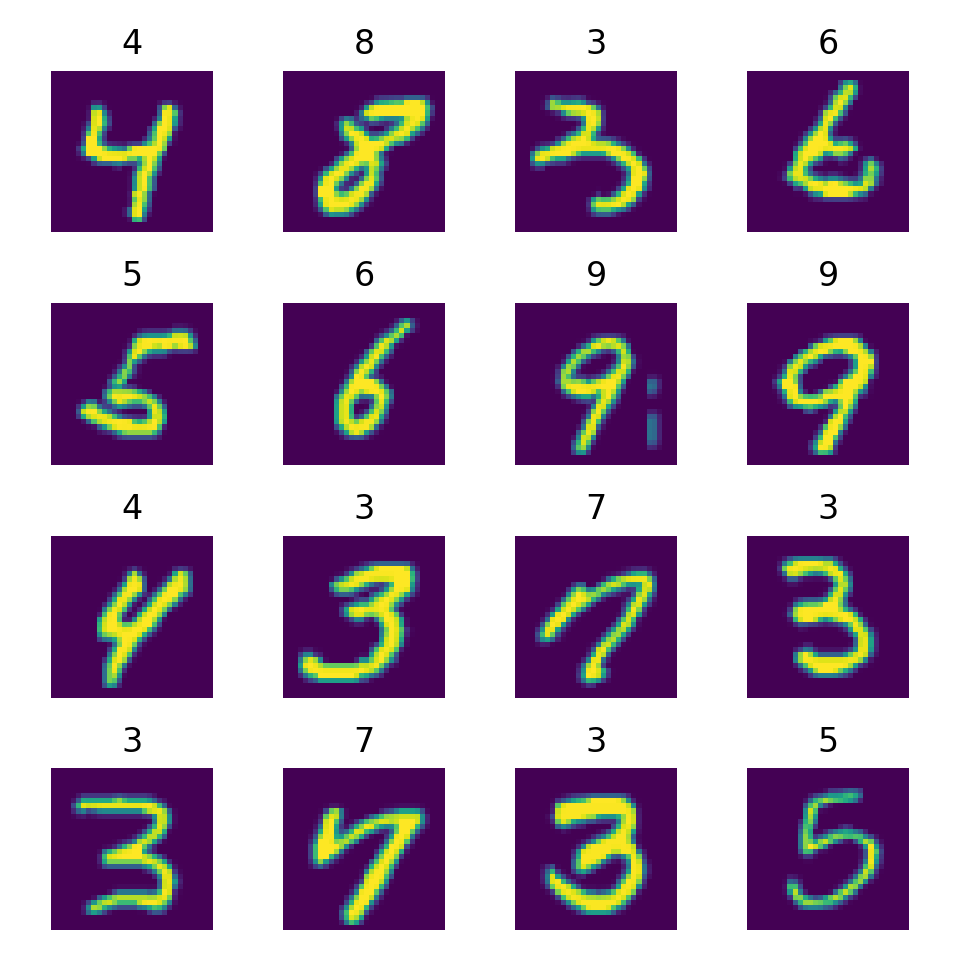

(<Figure size 480x480 with 16 Axes>, <numpy.flatiter at 0x2272abbc090>)

In [11]:
util.show_imgs(x[:16], titles=guess[:16].tolist())

In [2]:
root = os.path.join(os.environ['FOUNDATION_DATA_DIR'], 'mnist')
root

'C:\\Users\\anwan\\Documents\\workspace\\local_data\\mnist'

In [3]:
os.listdir(root)

['fid_stats.yaml', 'MNIST']

In [5]:
path = os.path.join(root, 'fid_stats.yaml')
path

'C:\\Users\\anwan\\Documents\\workspace\\local_data\\mnist\\fid_stats.yaml'

In [6]:
stats = load_yaml(path)
len(stats)

1

In [ ]:
stats

In [7]:
stat = stats[0]
stat.keys()

dict_keys(['dim', 'mode', 'mu', 'sigma'])

In [8]:
mode, dim = stat['mode'], stat['dim']
mode, dim

('train', 2048)

In [9]:
h5path = os.path.join(root, 'fid_stats.h5')

In [11]:
f = hf.File(h5path, 'w')

# with hf.File(h5path, 'w') as f:
    

In [24]:
mu, sigma = np.array(stat['mu'], dtype=np.float32), np.array(stat['sigma'], dtype=np.float32)
mu.shape, sigma.shape

((2048,), (2048, 2048))

In [27]:
with hf.File(h5path, 'w') as f:
    f.create_dataset(f'{mode}_{dim}_mu', data=mu)
    f.create_dataset(f'{mode}_{dim}_sigma', data=sigma)

In [28]:
f = hf.File(h5path, 'r')
f.keys()

<KeysViewHDF5 ['train_2048_mu', 'train_2048_sigma']>

In [29]:
m = f['train_2048_mu'].value
m.shape

C:\Users\anwan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """Entry point for launching an IPython kernel.


(2048,)

In [31]:
x = f['train_2048_mu']

In [32]:
'train_2048_mu' in f

True